In [48]:
from sklearn import cross_validation, datasets, metrics, tree 

import numpy as np
import pandas as pd

In [49]:
digits = datasets.load_digits()

In [50]:
X = digits.data

In [51]:
y = digits.target
cv_size = 10 

In [52]:
from sklearn.cross_validation import cross_val_score

In [53]:
clf = tree.DecisionTreeClassifier(random_state=1)

In [62]:
def plot_scores(scores):
    pylab.grid(True)
    pylab.plot(range(cv_size), scores, label='cv scores')
    pylab.ylim((0.0, 1.05))
    pylab.legend(loc='lower right')

In [64]:
def write_ans(filename, score):
    with open(filename, 'w') as f_out:
        f_out.write(str(score))

In [65]:
ans1 = cross_val_score(clf, X, y, cv = cv_size)
ans1 = np.mean(ans1)
print(ans1)
write_ans("task_1.txt", ans1)

0.8308624439503834


In [66]:
from sklearn.ensemble import BaggingClassifier

In [67]:
bag_class = BaggingClassifier(base_estimator=clf, n_estimators=100)

In [69]:
ans2 = cross_val_score(bag_class, X, y, cv = cv_size)
ans2 = np.mean(ans2)

In [70]:
write_ans("task_2.txt", ans2)

In [73]:
n_f = int(np.sqrt(X.shape[1]))

In [75]:
bag_class2 = BaggingClassifier(base_estimator=clf, n_estimators=100, max_features = n_f)
ans3 = cross_val_score(bag_class, X, y, cv = cv_size)
ans3 = np.mean(ans3)
write_ans("task_3.txt", ans3)

In [83]:
clf_new = tree.DecisionTreeClassifier(max_features = n_f)
bag_class3 = BaggingClassifier(clf_new, n_estimators=100)
ans4 = cross_val_score(bag_class3, X, y, cv = cv_size)
ans4 = np.mean(ans4)
print(ans4)
write_ans("task_4.txt", ans4)

0.9538782043698714


In [84]:
from sklearn.ensemble import RandomForestClassifier

In [87]:
n_trees = range(5,100,5)

In [96]:
scoring = []
for i in n_trees:
    ranfor = RandomForestClassifier(max_features = n_f, n_estimators = i)
    ans = cross_val_score(ranfor, X, y, cv = cv_size, scoring = 'accuracy')
    scoring.append(np.mean(ans))


In [97]:
scoring

[0.8838271498029219,
 0.9315206103325471,
 0.9361322420513896,
 0.9445242826718496,
 0.9427595709215758,
 0.9488458193802962,
 0.9455068245335637,
 0.9483344028353757,
 0.9488566059088133,
 0.9471833429458769,
 0.947183874363622,
 0.9466277217567759,
 0.9517204030477796,
 0.9555976195664873,
 0.9538388360232618,
 0.9506002127557898,
 0.952740657075684,
 0.9477764691261441,
 0.9456023778096541]

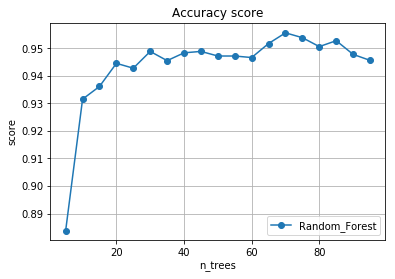

In [100]:
pylab.plot(n_trees, scoring, "-", marker = 'o', label = "Random_Forest")
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [102]:
scoring2 = []
total_features = X.shape[1]
n_features = np.arange(0.1,1.1,0.1)
for j in n_features:
    maxfeat = int(j*total_features)
    ranfor2 = RandomForestClassifier(max_features = maxfeat, n_estimators = 50)
    ans2 = cross_val_score(ranfor2, X, y, cv = cv_size, scoring = 'accuracy')
    scoring2.append(np.mean(ans2))

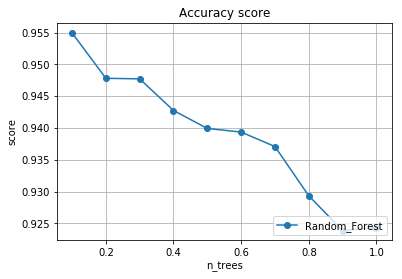

In [103]:
pylab.plot(n_features, scoring2, "-", marker = 'o', label = "Random_Forest")
pylab.grid(True)
pylab.xlabel('n_trees')
pylab.ylabel('score')
pylab.title('Accuracy score')
pylab.legend(loc='lower right')

In [107]:
ranfor3 = RandomForestClassifier(max_features = n_f, n_estimators = 50, max_depth = 5)
ans3 = cross_val_score(ranfor3, X, y, cv = cv_size, scoring = 'accuracy')
print(np.mean(ans3))
ranfor4 = RandomForestClassifier(max_features = n_f, n_estimators = 50)
ans4 = cross_val_score(ranfor4, X, y, cv = cv_size, scoring = 'accuracy')
print(np.mean(ans4))

0.9059354628480879
0.9539301070561559
